# Predicting Happiness (Title TBD)
# Does Money Buy Happiness?
### Analyzing the most influential factors in determining happiness.

Collaborators: Grace Koerner, Samuel Oates, Sudharma Bhat 

<hr>

# Notes for group members: 

Hey so i've combined three happiness report dataframes, then added data from two other data frames, education index and internet acess. I've graphed each variables relationships with happiness score, and made a hat map/ correlation matrix thast shows what variabes are strongly correlated with each other. 

Also its kinda messy since i dont have good comments or descriptions of what the code is doing, ill probably work on that later.

Also whoever is writing the prose and stuff remember that the GDP for capita is logged. Also research a little about what the numbers mean. I think the data was collected from a server so i think the values are like between 0 and 1. So like an example would be 0 for doesn't trust government, 1 for trusts government, etc...

# <ins>Introduction</ins>

The purpose of this tutorial is to walk you through the data science pipeline, using happiness... We will be investigating the various factors that contribute to happiness around the world, and trying to answer the long-asked question: can money buy happiness? It seems that those with money preech a low-income lifestyle, and those lacking money long for the material goods. We hope to analyze and interpret what affects happiness, specifically worldwide, the most...

We will begin by procurring our data from different sources, mainly csv files and through data scraping, and cleaning that data. After we've prepared our data, we'll perform exploratory data analysis so we can observe the relationships between various factors and happiness. Finally, we will train different machine learning models to our data to gather valuable insights and to hopefully understand what contributes to happiness on a worldwide scale. 

Most of the data used in this project comes from The World Happiness Report, which is a collaborative effort involving Gallup, the Oxford Wellbeing Research Centre, the UN Sustainable Development Solutions Network, and the WHR Editorial Board. The report uses data from the Gallup World Poll to rank countries. During this poll they ask participants to rank different aspects of their lives from 0 to 10, with 0 being the absolute worst and 10 being the absolute best. The report highlights six variables influencing happiness: GDP per capita, social support, healthy life expectancy, freedom, generosity, and corruption.

Happiness is more than just a simple feel-good emotion. It’s a strong force that has significant impacts on health and well-being - it's been proven to lead to better relationships, increase social connection and contribution to the lives of others, and contribute to healthier physical wellbeing. Happiness helps keep you alive! It (obviously) lowers levels of stress, anxiety, depression, and influences those around you in the same way. It cannot be 'stressed' enough how important being happy is! 

The goal of our project is to raise awareness to the differences in happiness levels across the world, and why exactly that is. This may help you, the reader, make decisions later on about your own life and how to increase your happiness - whether that be changing your profession all the way to moving across the country, that's up for your own interpretation.
##  ☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️

One final remark to note would be a constraint this project faces. COVID during 2022 had drastically different measures than all other years for most countries. Considering this year was two years deep into the pandemic, long enough for everyone to feel the effects of the sickness, quarantine, and other negative effects of experiencing a global pandemic, it has been exempted from our analysis today.


World happiness report main page: https://worldhappiness.report/

#### The Data Science Pipeline we will be following:
1. Data Collection
2. Data Processing
3. Exploratory Analysis and Data Visualization
4. Analysis, Hypothesis Testing, ML
5. Insight and Policy Decisionsion

<br>

# <ins>1. Data Collection</ins>

First we will gather data from the world happiness report, which will be in the form of a csv. This data will give us the essential variables needed for this tutorial, such as country, region, logged GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. 

In addition to these variables we will be adding percentage of population with internet access and education index; education index reflects the ratio of expected years of education, based off of the perception that those who are 25 and have received about 18 years of education have gone to / completed university, and average years of education received, based on the perception that those who are 25 should have definitely received 15 years of education. These statistics are averaged to determine the education index of a country, 1 being the highest, 0 being the lowest. 

Both education index and percentage of population with access to the internet will be scraped from the web. Education is an important aspect of life, and while success isn't solely defined by education, the availability and access to education reflects on the opportunities a country has available for its citizens, drastically affecting way of life - and in turn, happiness. The internet is a huge part of society nowadays, as it facilitates communication, provides entertainment, and a plethora of other services. Again, the internet isn't needed to be happy, however access to internet is likely highly related to a country's GDP per capita, which also most likely affects happiness.  

We'll be using pandas to read our data into dataframes.
<br>

#### Imports 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Links to data used:

World Happiness Report 2020: https://www.kaggle.com/datasets/londeen/world-happiness-report-2020

World Happiness Report 2021: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

World Happiness Report 2023: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023


In [3]:
# As we can see, 2022 is exempted from our analysis. We analyze years 2020, 2021, and 2023.

# Read data from the csv's into separate data frames 
df20 = pd.read_csv('World Happiness Report 2020.csv')
df21 = pd.read_csv('world-happiness-report-2021.csv')
df23 = pd.read_csv('WHR2023.csv')

#### Now that we've loaded our data into dataframes, let's see what we're working with!

In [4]:
df20.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
df21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
df23.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


# <ins>2. Data Processing</ins>

We need to clean up and manipulate our dataframes so they look *pretty*. Not only pretty, but readable and homogenous. We'll be renaming, getting rid of, switching around, and doing all those nice things to our columns of each of our dataframes. We'll be using pandas, once again.


As we can see, there are some differences between some of the column names in our data set. Also, not all of the data frames share the same number of columns. If we want to be able to combine these into one, we'll need to take care of this. We're going to want to standardize our column names. So what we'll do is make sure all columns referring to country are labeled "Country", and all columns related to happiness score are labeled "Happiness score." We will also be dropping several columns from our data. 

In [7]:
# Renaming columns so they all share the same names. Also dropping unnecessary columns
df20.rename(columns={"Ladder score": "Happiness Score", "Country name": "Country"}, inplace=True)
df20.drop(columns = ["Standard error of ladder score","upperwhisker","lowerwhisker" ], inplace= True)
# Easier to drop the last 8 columns that to type out column names in the drop function 
df20 = df20.iloc[:, :-8]

# Now that we have some of our desired columns, we need to rename each one accordingly
df21.rename(columns={"Ladder score": "Happiness Score", "Country name": "Country"}, inplace=True)

# There are still a few we don't need
df21.drop(columns = ["Standard error of ladder score","upperwhisker","lowerwhisker" ], inplace= True)
df21 = df21.iloc[:, :-8]

# Our final clean up of the columns
df23.rename(columns={"Ladder score": "Happiness Score", "Country name": "Country"}, inplace=True)
df23.drop(columns = ["Standard error of ladder score","upperwhisker","lowerwhisker" ], inplace= True)
df23 = df23.iloc[:, :-8]


#### After we've standardized our column names, let's see what our dataframes look like now. 

In [8]:
df20.head()

,Country,Regional indicator,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [9]:
df21.head()

,Country,Regional indicator,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [10]:
df23.head()

,Country,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379


#### Now that we've renamed our columns and dropped unneeded ones, it's time to combine our data. But first, not all data frames have the same number of countries. So, let's create a set of all the countries shared between the dataframes. 

In [11]:
# Get common countries across all DataFrames
common_countries = set(df20['Country']) & set(df21['Country']) & set(df23['Country'])
print(common_countries)

{'Egypt', 'New Zealand', 'Tajikistan', 'Ireland', 'Austria', 'United Arab Emirates', 'Russia', 'Gabon', 'Benin', 'China', 'Senegal', 'France', 'Germany', 'Latvia', 'Mali', 'Ecuador', 'Zambia', 'Kosovo', 'Kazakhstan', 'Hungary', 'Greece', 'Ethiopia', 'Liberia', 'South Africa', 'Comoros', 'Sierra Leone', 'Mozambique', 'Japan', 'Vietnam', 'Algeria', 'Zimbabwe', 'Peru', 'Afghanistan', 'Slovakia', 'Lithuania', 'Croatia', 'Congo (Brazzaville)', 'Singapore', 'El Salvador', 'Bosnia and Herzegovina', 'Saudi Arabia', 'Ivory Coast', 'Mexico', 'Kyrgyzstan', 'Moldova', 'Paraguay', 'Georgia', 'Mongolia', 'Switzerland', 'Dominican Republic', 'Laos', 'Morocco', 'Norway', 'Mauritius', 'South Korea', 'Pakistan', 'Hong Kong S.A.R. of China', 'Uruguay', 'Nepal', 'Uganda', 'Serbia', 'Nicaragua', 'Estonia', 'Guatemala', 'Australia', 'Thailand', 'Honduras', 'Iraq', 'Cambodia', 'Philippines', 'Iceland', 'Bolivia', 'Burkina Faso', 'Sweden', 'Togo', 'Indonesia', 'Costa Rica', 'Albania', 'Netherlands', 'Spain', 

#### Let's remove all other countries from our data frames before combining them

In [12]:
# Remove all countries that arent shared between data frames
df20 = df20[df20['Country'].isin(common_countries)]
df21 = df21[df21['Country'].isin(common_countries)]
df23 = df23[df23['Country'].isin(common_countries)]

In [13]:
# Stack the DataFrames, ignoring index to create a continuous index
df = pd.concat([df20, df21, df23], ignore_index=True)
df

,Country,Regional indicator,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
391,Botswana,NaN,3.4350,9.629000,0.753000,54.725000,0.742000,-0.215000,0.830000
392,Zimbabwe,NaN,3.2040,7.641000,0.690000,54.050000,0.654000,-0.046000,0.766000
393,Sierra Leone,NaN,3.1380,7.394000,0.555000,54.900000,0.660000,0.105000,0.858000
394,Lebanon,NaN,2.3920,9.478000,0.530000,66.149000,0.474000,-0.141000,0.891000


#### Notice how we have some NaN values in the Regional indicator column? Well, that's because not all of our data has that specific column. So let's fix this by creating a mapping of countries to their regional indicator using the data from df20, the World Happiness Data from 2020.

In [14]:
# Create a dictionary mapping countries to their regional indicators from df20
country_region_map = df20[['Country', 'Regional indicator']].set_index('Country').to_dict()['Regional indicator']

print(country_region_map)

{'Finland': 'Western Europe', 'Denmark': 'Western Europe', 'Switzerland': 'Western Europe', 'Iceland': 'Western Europe', 'Norway': 'Western Europe', 'Netherlands': 'Western Europe', 'Sweden': 'Western Europe', 'New Zealand': 'North America and ANZ', 'Austria': 'Western Europe', 'Luxembourg': 'Western Europe', 'Canada': 'North America and ANZ', 'Australia': 'North America and ANZ', 'United Kingdom': 'Western Europe', 'Israel': 'Middle East and North Africa', 'Costa Rica': 'Latin America and Caribbean', 'Ireland': 'Western Europe', 'Germany': 'Western Europe', 'United States': 'North America and ANZ', 'Belgium': 'Western Europe', 'United Arab Emirates': 'Middle East and North Africa', 'Malta': 'Western Europe', 'France': 'Western Europe', 'Mexico': 'Latin America and Caribbean', 'Taiwan Province of China': 'East Asia', 'Uruguay': 'Latin America and Caribbean', 'Saudi Arabia': 'Middle East and North Africa', 'Spain': 'Western Europe', 'Guatemala': 'Latin America and Caribbean', 'Italy': '

#### Now let's use this mapping to fill out our table!

In [15]:
# Apply this mapping to fill missing regional indicators in the combined DataFrame
df['Regional indicator'] = df['Country'].map(country_region_map)
df

,Country,Regional indicator,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
391,Botswana,Sub-Saharan Africa,3.4350,9.629000,0.753000,54.725000,0.742000,-0.215000,0.830000
392,Zimbabwe,Sub-Saharan Africa,3.2040,7.641000,0.690000,54.050000,0.654000,-0.046000,0.766000
393,Sierra Leone,Sub-Saharan Africa,3.1380,7.394000,0.555000,54.900000,0.660000,0.105000,0.858000
394,Lebanon,Middle East and North Africa,2.3920,9.478000,0.530000,66.149000,0.474000,-0.141000,0.891000


## <ins> 1.b. A Brief Interlude back to Data Collection</ins>


As mentioned previously, there may be other factors that influence happiness score like education or internet access. To gather our data we're going to be scraping tables (again!) from Wikipedia. 

In [16]:
# URL of the webpage containing the table of education index by country
url = "https://en.wikipedia.org/wiki/Education_Index"

# Send a GET request to the URL to retrieve the webpage content
res = requests.get(url)

# Create a BeautifulSoup object to parse the webpage content
bs = BeautifulSoup(res.text, 'html.parser')

# Find the table containing the education index data
table = bs.find("table")

# Convert the table to a string and create a StringIO object from the string of the table
table_str = str(table)
table_io = StringIO(table_str)

# Read the table into a DataFrame using pandas
# Specify the flavor as 'bs4' to indicate that BeautifulSoup is being used for parsing
dfEdIndex = pd.read_html(table_io, flavor='bs4')[0]

# Keep only the desired columns ('Country' and '2019') from the DataFrame
dfEdIndex = dfEdIndex[['Country', '2019']]

# Rename the column '2019' to 'Education index'
dfEdIndex.rename(columns={"2019": "Education index"}, inplace=True)

# Display the resulting DataFrame
dfEdIndex.head()

,Country,Education index
0,Afghanistan,0.414
1,Albania,0.746
2,Algeria,0.672
3,Andorra,0.720
4,Angola,0.500


In [17]:
# URL of the webpage containing the table
url2 = 'https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users'

# Send a GET request to the URL to retrieve the webpage content
res = requests.get(url2)

# Create a BeautifulSoup object to parse the webpage content
bs = BeautifulSoup(res.text, 'html.parser')

# Find all tables on the webpage
tables = bs.find_all("table")

# Extract the 6th table (index 5)
table_str = str(tables[5])

# Convert the table to a string
table_io = StringIO(table_str)

# Read the table data into a DataFrame using pandas read_html method
# Specify the flavor as 'bs4' to indicate that BeautifulSoup is being used for parsing
dfInternet = pd.read_html(table_io, flavor='bs4')[0]

# Keep only the desired columns ('Country or area' and 'Pct') from the DataFrame
dfInternet = dfInternet[['Country or area', 'Pct']]

# Rename the columns to more meaningful names
dfInternet.rename(columns={"Country or area": "Country", 'Pct': 'Pct with internet access'}, inplace=True)

# Remove the percentage sign from the 'Pct with internet access' column and convert it to float
dfInternet['Pct with internet access'] = dfInternet['Pct with internet access'].str.replace('%', '').astype(float)

# Display the resulting DataFrame
dfInternet.head()

,Country,Pct with internet access
0,China,77.3
1,India,62.6
2,United States,92.4
3,Indonesia,78.8
4,Pakistan,70.8


#### Now that we've scraped our data, let's include the education index data!

In [18]:
df = pd.merge(df, dfEdIndex, on='Country', how='left')
df

,Country,Regional indicator,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Education index
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,0.927
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,0.920
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,0.900
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,0.926
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,0.930
...,...,...,...,...,...,...,...,...,...,...
391,Botswana,Sub-Saharan Africa,3.4350,9.629000,0.753000,54.725000,0.742000,-0.215000,0.830000,0.676
392,Zimbabwe,Sub-Saharan Africa,3.2040,7.641000,0.690000,54.050000,0.654000,-0.046000,0.766000,0.587
393,Sierra Leone,Sub-Saharan Africa,3.1380,7.394000,0.555000,54.900000,0.660000,0.105000,0.858000,0.406
394,Lebanon,Middle East and North Africa,2.3920,9.478000,0.530000,66.149000,0.474000,-0.141000,0.891000,0.604


#### Now let's add our access to internet data.

In [19]:
df = pd.merge(df, dfInternet, on='Country', how='left')
df

,Country,Regional indicator,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Education index,Pct with internet access
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,0.927,97.7
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,0.920,92.4
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,0.900,91.4
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,0.926,99.9
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,0.930,94.8
...,...,...,...,...,...,...,...,...,...,...,...
391,Botswana,Sub-Saharan Africa,3.4350,9.629000,0.753000,54.725000,0.742000,-0.215000,0.830000,0.676,36.7
392,Zimbabwe,Sub-Saharan Africa,3.2040,7.641000,0.690000,54.050000,0.654000,-0.046000,0.766000,0.587,28.0
393,Sierra Leone,Sub-Saharan Africa,3.1380,7.394000,0.555000,54.900000,0.660000,0.105000,0.858000,0.406,11.9
394,Lebanon,Middle East and North Africa,2.3920,9.478000,0.530000,66.149000,0.474000,-0.141000,0.891000,0.604,85.0


# <ins>3. Exploratory Analysis and Data Visualization</ins>

We have our data organized quite nicely now, and we want to use it to create visualizations for our reader to more easily comprehend what we're all looking at. We have our combined dataframe over the course of three years, so we're gonna plot a lot of the relationships between happiness and the other variables, as well as plot the relationships between the variables themselves.

Let's first start with some simple scatter plots of the variables we've collected versus the happiness score each country received.r.

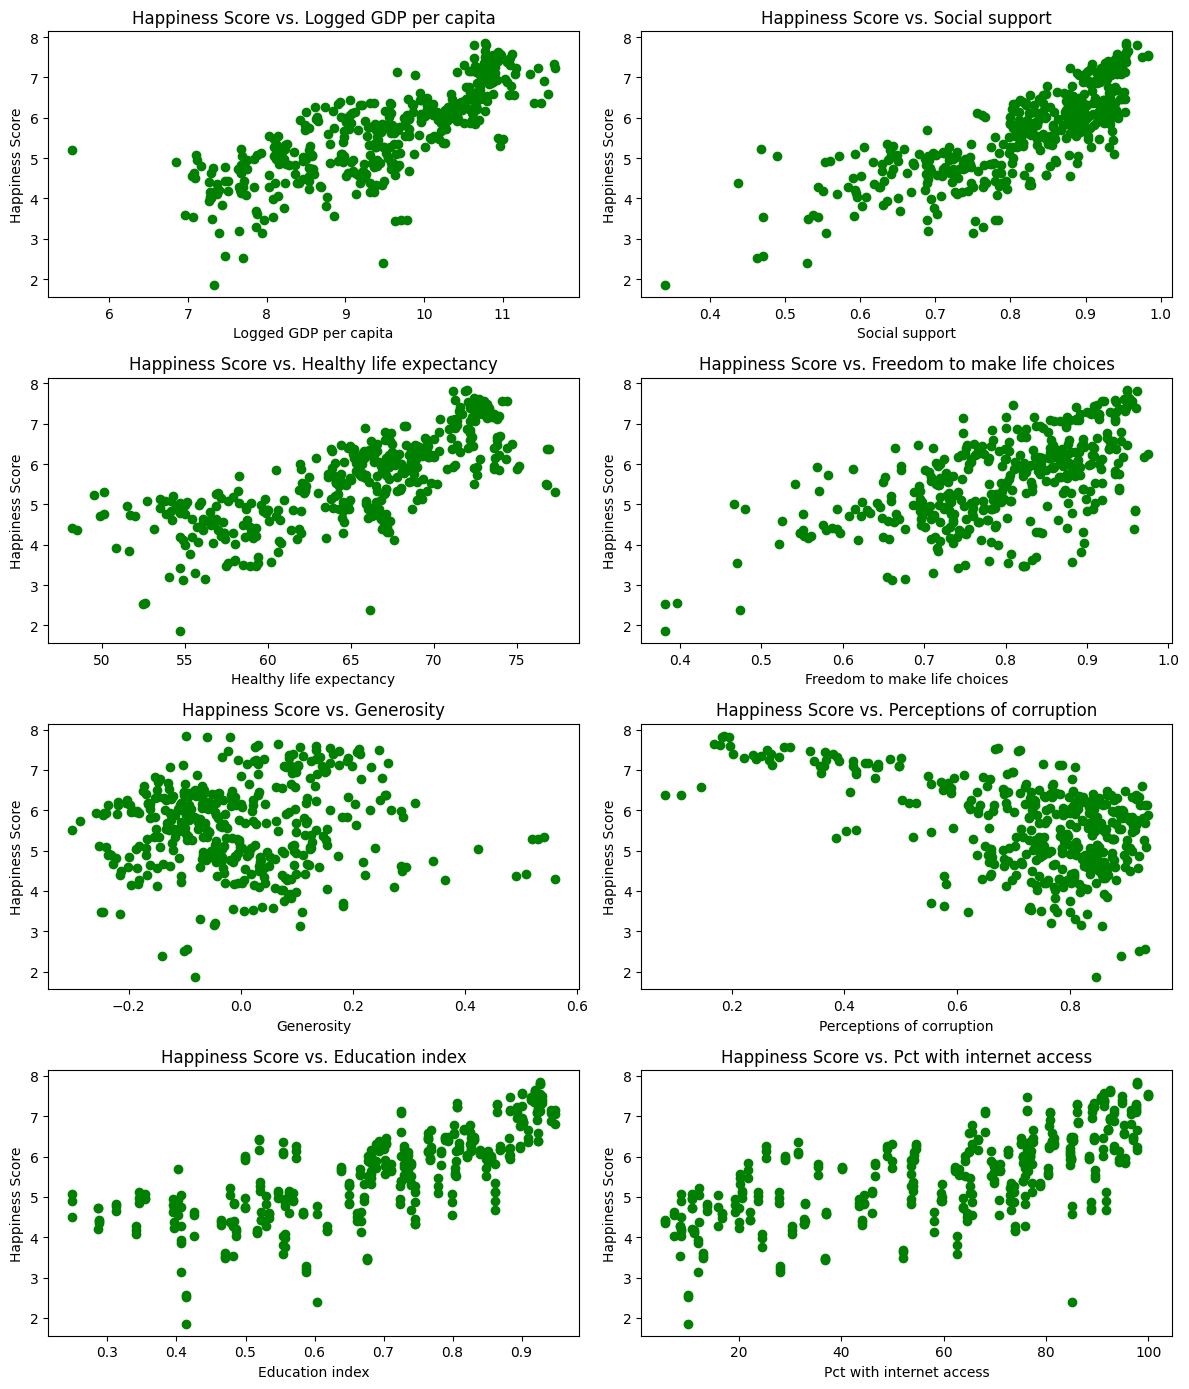

In [20]:
# Create a grid of subplots with 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(12, 14))

# Reshape the axes array to be 1-dimensional so we can iterate through it
axes = axes.reshape(8, 1)

# Get the column names from the DataFrame, excluding the first three columns
columns = df.columns
columns = columns[3:]

# Iterate over each column (variable) in the DataFrame
for i, variable in enumerate(columns):
    # Access the corresponding axis for the subplot
    ax = axes[i][0]
    
    # Create a scatter plot of the variable against "Happiness Score"
    ax.scatter(df[variable], df["Happiness Score"], color = 'green')
    
    # Set title, x-axis label, and y-axis label for the subplot
    ax.set_title("Happiness Score vs. " + f"{variable}")
    ax.set_xlabel(f"{variable}")
    ax.set_ylabel("Happiness Score")

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()



From looking at these plots, we can see that most of the variables have a clear positive linear relationship with happiness score - we see having a higher gdp per capita, social support, life expectancy, and freedom to make life choices all increase with a higher happiness score. Education index and internet access share a similar relationship, slightly positive. Our two outliers are perception of corruption and generosity. Perception of corruption can be considered an outlier because it has a negative linear relationship - oddly enough, this could still tell us about each country's happiness. Those that are more unaware of the corruption in their government are seemingly happier? We'll have to revisit this more later. On the other hand, generosity doesn't show much of a linear relationship at all - it's fairly evenly spread. In this case, generosity won't help us much in predicting happiness scores.



Let's move on to which regions are happier, and talk about why the data may look so different. For example, Africa has a ton of countries while North America does not, which is one reason that can that explain why the data looks visually different!

/var/folders/bn/54gw4wdd4y33r69x6r_71xr80000gn/T/ipykernel_27872/6958391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Regional indicator', y='Happiness Score', data=df, palette='coolwarm')


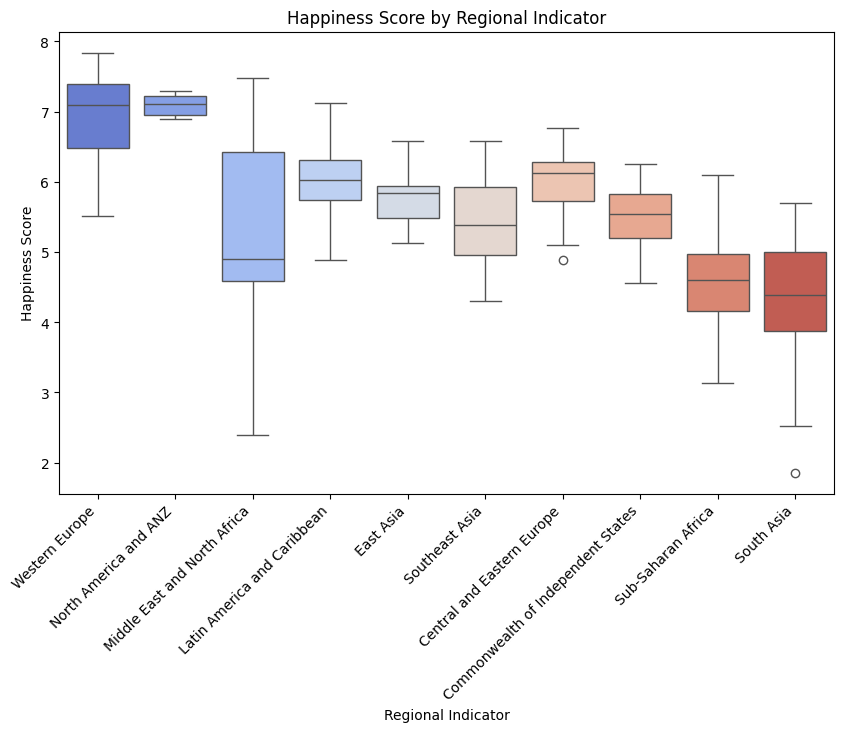

In [21]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot using seaborn
sns.boxplot(x='Regional indicator', y='Happiness Score', data=df, palette='coolwarm')

# Set title, x-axis label, and y-axis label
plt.title('Happiness Score by Regional Indicator')
plt.xlabel('Regional Indicator')
plt.ylabel('Happiness Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


As we can see, the length of each box plot describes the varaince of happiness score for the countries within that region. Our eyes may stray to Africa first, as it is the largest boxplot on the graph with the largest variance. It also has the lowest happiness score of all the regions. We see Western Europe also not only has the highest happiness score, but seemingly ties at the highest median happiness score - North American and ANZ seemingly fall at that median, too. Their median happiness score lies around 7, with 10 being the highest and 0 being the lowest. Just about every region's median happiness score lies between 4.5 and just above 7.

Let's use one more graph to visualize the relationships between happiness and the variables we've looked at. We can see just how correlated each variable is with happiness based on this heat map. We can also see the correlation between the variables themselves.

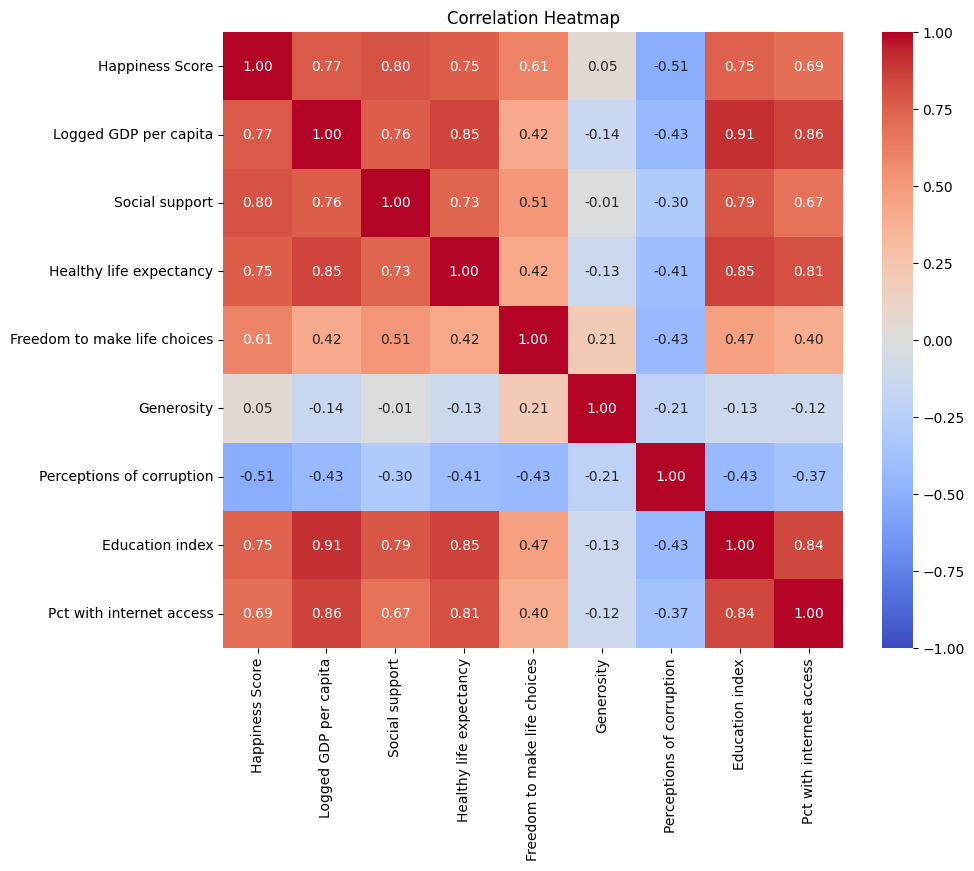

In [22]:
# Calculate the correlation matrix for selected features
correlation_matrix = df[['Happiness Score', 'Logged GDP per capita', 'Social support', 
                         'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
                         'Perceptions of corruption', 'Education index', 'Pct with internet access']].corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Set title for the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

This is really useful and tells us a lot! Not only the correlations between our variables and happiness, but correlations between each other. Super cool! Let's talk about why these correlations make sense:

Right off the bat we're drawn to the blue categories as they're clearly different! The two blue categories are generosity and corruption. This means that they're the least correlated to happiness score as well as the other variables! From our legend we see hot red means highly correlated (at 1.00) whilst dark blue is the least correlated (-1.00). Corruption, differentiating from what we may have assumed earlier, appears to be the least correlated variable as it has the lowest scores. Similarly, it is the least correlated overall to happiness! As for generosity, the colors are more neutral, meaning it is neither correlated nor uncorrelated to other variables.

Let's now look at the redder categories. Some interesting relationships we may notice, before discussing happiness, would be logged GDP per capita and education index. Our assumptions from earlier were deemed correct - the more education, the higher the money... This is our strongest relationship on the board. Logged GDP per capita actually holds three of the highest correlations to other variables; besides education index, healthy life expectancy and internet access. There is a very strong relationship between education index and healthy life expectancy as well, tying with the third highest of the table with logged GDP and education index. 

Finally, let's analyze the strongest correlated variables to happiness score. The winner of correlation among all variables we've looked at is actually social support! This includes friends, family, colleagues, and more... We may be tempted to answer the long-awaited question right now, but we need to do more analyzing before we come to a conclusion. Besides, social support only beats logged GDP per capita by .03... Besides these two, healthy life expectancy and education index are the next highest correlated variables to happiness. Every other variable falls below a correlation rank of .7, though internet access was close at .69. Let's keep these in mind as we continue.

# <ins>4. Analysis, Hypothesis Testing, and Machine Learning
We've seen a few graphs to visualize the relationships between our variables and happiness score. To further our understanding and analysis, and dive into our hypothesis (does money buy happiness?) we'll apply a few machine learning techniques to our datasets to confirm or deny our suspicions...

### Random Forests
We want to predict happiness scores based on the other variables, then compare with our actual scores. Random forests are a great technique that are resistant to overfitting and very fit for high-dimensional datasets, such as ours. 

#### You can read more about random forests here: https://typeset.io/questions/what-are-the-main-advantages-and-disadvantages-of-the-random-52h0p2qku9

Mean Squared Error:
0.166487714869035


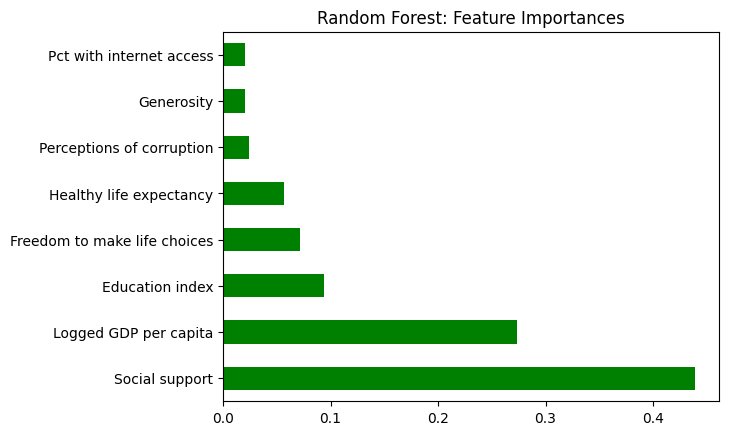

In [23]:
# Random forest time
# Let's grab our desired variables
features = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Education index', 'Pct with internet access']]
# We want to train against happinessss
target = df['Happiness Score']

# Using sklearn to train our model, we've used 20% of our data as the test set, 80% as the training to come up with our model!
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

# Random forests model has one hundo trees
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

# We fit the model on our training data
model.fit(X_train, y_train)

# Furthermore we want to predict happiness scores based on this 
predicts = model.predict(X_test)

# Calculate the mean squared error + print it
mse = mean_squared_error(y_test, predicts)
print("Mean Squared Error:")
print(mse)

# Plotting tings
feature_importances = pd.Series(model.feature_importances_, index = features.columns)
feature_importances.nlargest(len(features.columns)).plot(kind = 'barh', color = 'green')
plt.title('Random Forest: Feature Importances')
plt.show()


WOA. First, let's review the mean squared error. This model got an MSE of .165, which is pretty good (close to 0). That means it seems to be fairly accurate. Let's dive into our model:

The y-axis contains our variables that contribute to happiness score. The x-axis contains the normalized variables' importance score. We understand a higher score means the feature is more important, and lower scores contribute less to the predictions. For predicting happiness, the winner is: social support! It has about 45% influence on predicting a happiness score. The fight is not over yet, though; logged GDP per capita still comes in strong around just under 30%. We're learning some other important notes from this model, too; we suspected generosity had little effect on happiness score from our visual models earlier, but it appears internet access has even less contribution! Internet access, generosity, and perception of corruption all lay near 2-3% contribution to happiness score. On the other hand, education index falls near 10%, which is a noticeable contribution.

Of course, this doesn't mean too much if our predictions are not accurate. Let's move on to our second goal; comparing the predictions from our random forest with actual scores.

Slope coefficient:
[ 1.18267608 -1.12700208]


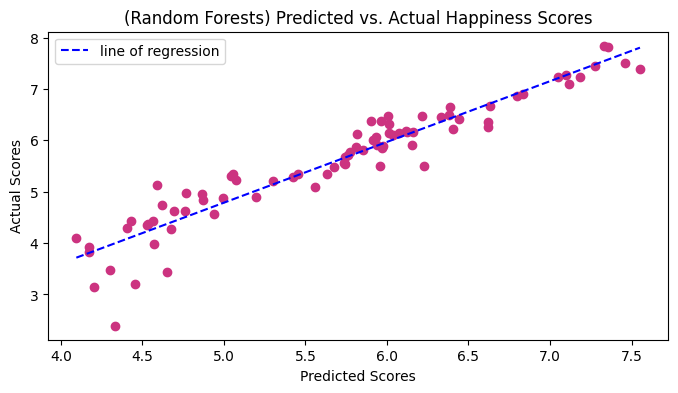

In [24]:
plt.figure(figsize=(8, 4))

# Pretty in pink
dark_pink = (0.8, 0.2, 0.5)

# plotting our points
plt.scatter(predicts, y_test, color = dark_pink)

# Fitting a line of regression to this scatterplot of predicted vs actual to look at the slope (coeff)
coefficient = np.polyfit(predicts, y_test, 1)
regression = np.poly1d(coefficient)
x_values = np.linspace(predicts.min(), predicts.max(), 100)
plt.plot(x_values, regression(x_values), color = 'blue', linestyle = '--', label = 'line of regression')
plt.legend(fontsize = 'medium')

plt.title('(Random Forests) Predicted vs. Actual Happiness Scores')
plt.xlabel('Predicted Scores')
plt.ylabel('Actual Scores')

print("Slope coefficient:")
print(coefficient)

plt.show()

Not too bad, right? We see that the predictions were fairly accurate based on 1) the slope coefficient. The slope coefficient is .955, which is almost 1! A slope of almost 1 means our model is really accurate. That would mean next to nothing if it weren't also for 2) our previous MSE. An MSE of .165 (close to 0) with a slope of .955 (close to 1) means our random forest did a good estimation. Thank you, Random Forest.

From this graph, we know our previous predictions were fairly accurate and we can now keep in mind that social support significantly influenced happiness score, with logged GDP per capita closely behind it. We'll train a few more machine learning techniques just to be sure, though. 

##  ☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️☺️

### PCA

We want to predict happiness scores based on the other variables, then compare with our actual scores. We'll use Principal Component Analysis this time. Just to review, PCA is a dimensionality reduction method that we'll use to reduce the dimensionality of our dataset, which is pretty big. It will help us see any "hidden" patterns, while preserving variance!

#### You can find more about PCA here: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Accounted variance ratio: [0.60864639 0.16535768 0.07796839 0.06419802 0.03654004 0.02225448
 0.0153358  0.0096992 ]


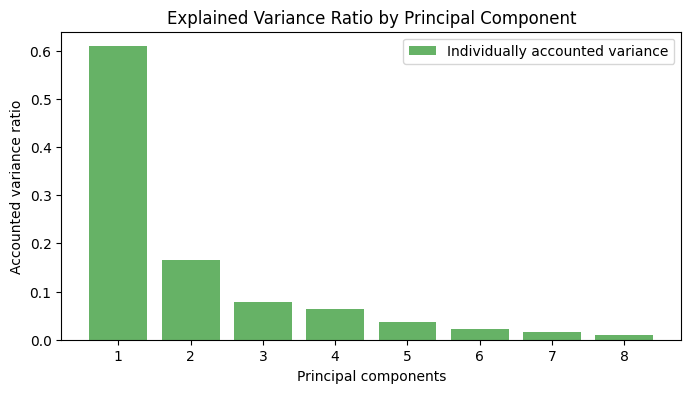

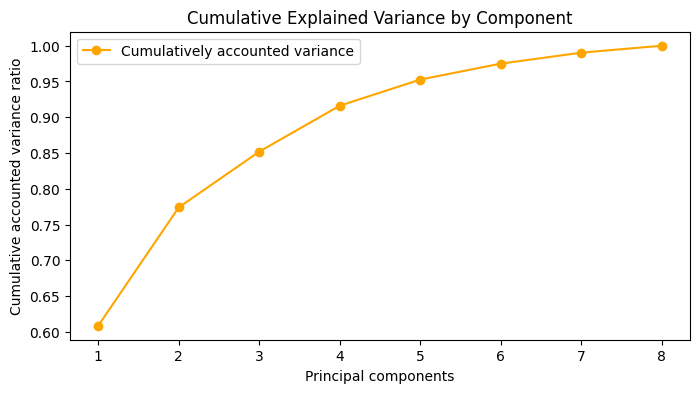

In [25]:
# We need to standardize our variables
features_clean = features.dropna()
cleaned_indices = features_clean.index # need for later 

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_clean)

# Initialize PCA object
pca = PCA(n_components = min(features_scaled.shape[0], features_scaled.shape[1]))

# Fit and transform the scaled data
features_pca = pca.fit_transform(features_scaled)

# Print the amount of variance explained by each component
print("Accounted variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize = (8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha = 0.6, color = 'green', label = 'Individually accounted variance')
plt.ylabel('Accounted variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Component')
plt.legend(fontsize = 'medium')
plt.show()

plt.figure(figsize = (8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), color = 'orange', marker = 'o', label = 'Cumulatively accounted variance')
plt.ylabel('Cumulative accounted variance ratio')
plt.xlabel('Principal components')
plt.title('Cumulative Explained Variance by Component')
plt.legend(fontsize = 'medium')
plt.show()

Let's review what these two graphs mean:

Our first graph breaks up the variance of our dataset into principal components. This means the first principal component, which has a ratio of .6086, accounts for approximately 61% of the variance in our original dataset. The second PC accounts for an additional 16.5%, which we see is added in our (second) cumulative accounted variance graph. The third PC accounts for an additional 7.8%, PC4 accounts for 6.4%, and so on until our dataset variance is fully accounted for (in our cumulative graph, the full 1.00 ratio is hit with our eighth PC). For analysis purposes, we'll be looking at just PC1 and PC2 as they account for over 70% of our datatset's variance, which is pretty good.

As we did before, let's put these principal components to use and figure out the loadings of each feature. Wait, what does loading mean, I hear? Let's explain before we look at the results:

The ABSOLUTE VALUE of the loading coefficient of each feature tells us how strongly the feature contributes to the principal component. As for the SIGN of the coefficient, a positive coefficient means the feature and component increase together; a negative sign indicates the more of the feature, the less of the PC. The PCAs are linear combinations of the original variables, in which the loadings are the coefficients of each vector. This might sound like a bunch of mumbo jumbo right now. Let's look at the actual loading coefficients to explain more.

In [26]:
loadings = pca.components_
loadings_df = pd.DataFrame(data=loadings, columns=features.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
print(loadings_df)

     Logged GDP per capita  Social support  Healthy life expectancy  \
PC1              -0.429379       -0.387321                -0.414358   
PC2              -0.130233       -0.000249                -0.117168   
PC3              -0.013880       -0.369262                -0.024812   
PC4               0.166865       -0.068686                 0.091868   
PC5               0.090004       -0.741847                 0.099550   
PC6               0.180056        0.201764                -0.857399   
PC7              -0.119138        0.326148                 0.242517   
PC8               0.846122       -0.107204                -0.040817   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
PC1                     -0.289727    0.024026                   0.251804   
PC2                      0.409729    0.760579                  -0.436577   
PC3                     -0.086299   -0.438643                  -0.812535   
PC4                     -0.825359    0.455277           

Let's use PC1 to explain the loadings of each feature. The largest absolute value of these coefficients is logged GDP per capita, meaning this factor most strongly influences PC1. Because the coefficient is negative, though, you may be quick to assume that lower GDP contributes to more happiness..? That is not the case, necessarily; we need to look at the correaltion coefficient of PC1 to determine logged GDP's actual effect on happiness, not just PC1. So far, we can only determine that more GDP decreases PC1's value.

Let's look at a few other notable loadings. Social support's absolute value of the loading coefficient is about .04 less than logged GDP per capita, meaning logged GDP per capita influenced PC1 just slightly more... We also notice generosity is near 0, meaning it had almost no effect on PC1. We're going to calculate the correlation coefficient for each PC next to really see each feature's relationship with happiness.

In [27]:
happy_clean = df.loc[cleaned_indices, 'Happiness Score']

pc_df = pd.DataFrame(data=features_pca, columns=[f'PC{i+1}' for i in range(features_pca.shape[1])])

pc_df['Happiness Score'] = happy_clean.values

correlation_matrix = pc_df.corr()

happiness_correlations = correlation_matrix['Happiness Score'].drop('Happiness Score')
print(happiness_correlations)

PC1   -0.867096
PC2    0.155508
PC3   -0.025786
PC4   -0.052143
PC5   -0.129197
PC6   -0.031941
PC7    0.113699
PC8    0.068544
Name: Happiness Score, dtype: float64


As stated earlier, let's drive deeper into analyzing PC1 and PC2 and their correlation coefficients. PC1's correlation coefficient is negative... If I recall from earlier, both logged GDP per capita and social support's loading coefficients were negative... aha!

We see that because both coefficients were negative for these two variables, that means there is actually a positive relationship between both logged GDP per capita and social support in accordance to happiness score! We determined earlier that the higher GDP meant a lower PC1, and the negative coefficient of -.867 between PC1 and the happiness score tells us that higher values of PC1 are associated with lower happiness scores. This again confirms that higher GDP correlates to higher happiness, and the same goes for social support.

Comparing the features to one another, in the case for PC1, we can conclude that logged GDP per capita has a stronger correlation with happiness score than social support! This is because logged GDP per capita has a higher absolute value of loading coefficient on PC1, and since PC1 has a large negative coefficient to happiness score, the influence of logged GDP per capita on happiness is bigger, even if only slightly!

Let's take a quick look at PC2 as well. This correlation coefficient is actually positive, but very close to 0. This means the variations in the PC don't quite explain the variations in the happiness score. We see how this makes sense, as the correlation coefficient is positive, yet the loading coefficients for GDP and social support are negative, yet also extremely close to 0.





<h2>Ridge Regression</h2>

Finally we will use Ridge Regression to predict happiness scores of each country. Ridge Regression is a statiscal method used to reduce error for a linear regression that is overfit. We do this by adding a small amount of bias to correct the overfitted line.

You can find more about Ridge Regression here: https://www.ibm.com/topics/ridge-regression#:~:text=Ridge%20regression%E2%80%94also%20known%20as,for%20multicollinearity%20in%20regression%20analysis.

In [68]:
def grad_descent_ridge(X, y, T, alpha, lambda_reg):
    m, n = X.shape
    theta = np.zeros(n)
    f = np.zeros(T)
    for i in range(T):
        f[i] = 0.5 * np.linalg.norm(X.dot(theta) - y) ** 2 + (0.5 * lambda_reg * np.linalg.norm(theta) ** 2)
        g = np.transpose(X).dot(X.dot(theta) - y) + lambda_reg * theta
        theta = theta - alpha * g
        # print(str(i) + " " + str(X.dot(theta)))
    return theta, f

df_cleaned = df.dropna().reset_index(drop=True)
df_cleaned['Bias'] = np.ones(len(df_cleaned))
test = df_cleaned.sample(70)
for i,rows in test.iterrows():
    df_cleaned.drop(i)
    
features = df_cleaned[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Education index', 'Pct with internet access','Bias']].values
theta,loss = grad_descent_ridge(features, df_cleaned["Happiness Score"].values, 1000, 0.0000001, 3)


theta

array([ 0.01221461,  0.00183022,  0.07151298,  0.00185316,  0.00103285,
       -0.00084031,  0.00096738,  0.01400737,  0.00097629])

In [69]:
y = test["Happiness Score"]
args = test[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Education index', 'Pct with internet access']].values
y_hat = args.dot(theta[:-1]) + theta[-1]
mse = np.mean((y - y_hat) ** 2)
print("Actual Values: ",y.values)
print("Predicted Values: ",y_hat)
print("MSE: ",mse)

Actual Values:  [4.76870012 5.84       4.934      6.144      5.38430023 5.10150003
 6.125      4.981      7.268      3.819      6.796      2.523
 7.403      6.334      4.631      5.722      3.495      5.132
 4.18720007 6.012      5.329      4.073      7.29960012 4.279
 6.024      6.032      5.025      4.638      4.12       4.83279991
 5.738      4.75059986 6.014      5.931      6.65       6.66379976
 7.395      4.854      4.72930002 5.00509977 6.469      4.98080015
 6.22849989 6.405      5.677      7.095      7.123      6.69
 4.605      4.289      6.377      7.842      4.55789995 5.88980007
 5.992      4.636      6.26       5.91090012 5.84       5.339
 5.345      5.36       5.569      5.51499987 7.16450024 5.813
 4.984      6.00040007 7.473      6.647     ]
Predicted Values:  [4.14149767 5.65145999 5.29683061 5.84987305 5.98582865 5.81507459
 6.03040429 4.92631849 6.58599309 5.32356016 6.51618613 3.99144718
 6.52598248 6.22381529 4.6972598  6.04880529 4.45477629 4.76835934
 4.16159225 

Text(0.5, 1.0, 'Loss vs Iterations')

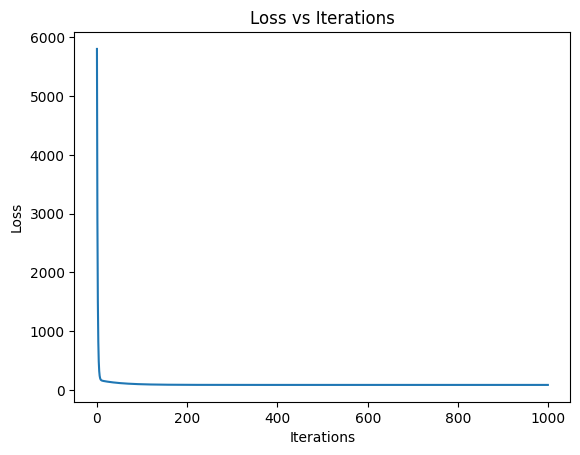

In [30]:
plt.plot(range(1000), loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")

With the Mean Squared Error of 0.35033 and with plot above that shows we have decreased the loss to 0 over 1000 iterations. Showing the accuracy of the Ridge Regression method.

<h3>Compaison of Each ML Model Accuracy</h3>

When comparing the predictor models we found that Random Forest


Random Forests MSE: 0.166487714869035

PCA Loss: 

Ridge Regression MSE: 0.1843499063723513